3. Úvod do lineární algebry

Zadání:
Důležitou částí studia na přírodovědecké fakultě je podobor matematiky zvaný lineární algebra. Poznatky tohoto oboru jsou základem pro oblasti jako zpracování obrazu, strojové učení nebo návrh mechanických soustav s definovanou stabilitou. Základní úlohou v lineární algebře je nalezení neznámých v soustavě lineárních rovnic. Na hodinách jste byli obeznámeni s přímou a iterační metodou pro řešení soustav lineárních rovnic. Vaším úkolem je vytvořit graf, kde na ose x bude velikost čtvercové matice a na ose y průměrný čas potřebný k nalezení uspokojivého řešení. Cílem je nalézt takovou velikost matice, od které je výhodnější využít iterační metodu.

### Task 3 Code

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import time

def direct_method(A, b):
    return np.linalg.solve(A, b)

def jacobi(A, b, niter, x0):
    x = x0
    D = np.diag(A)
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    for _ in range(niter):
        x = (b - np.matmul((L + U), x)) / D
    return x

def gauss_seidel(A, b, niter, x0):
    x = x0
    U = np.triu(A, k=1)
    Lstar = np.tril(A, k=0)               # D + L
    T = np.matmul(-np.linalg.inv(Lstar), U) # T = -invL* . U
    C = np.matmul(np.linalg.inv(Lstar), b)  # C = invL . b
    for _ in range(niter):
        x = np.matmul(T, x) + C             # x = Tx + C
    return x

def task3(matrix_sizes, num_repeats, jacobi_niter, gauss_niter, print_on):
    direct_times = []
    jacobi_times = []
    gauss_seidel_times = []
    #main loop
    for size in matrix_sizes:
        print(f"now examining size:{size}")
        direct_total_time = 0.0
        jacobi_total_time = 0.0
        gauss_seidel_total_time = 0.0
        
        for _ in range(num_repeats):
            A = matrix = np.random.rand(size, size)
            b = matrix = np.random.rand(size)
            #A = matrix[:, :-1]
            #b = matrix[:, -1]
            x0 = np.ones(size)

            start_time = time.time()
            dir_answ = direct_method(A, b)
            direct_total_time += time.time() - start_time
            
            start_time = time.time()
            jacobi_ans = jacobi(A, b, niter=jacobi_niter, x0=x0)
            jacobi_total_time += time.time() - start_time
            
            if size < 1001:
                start_time = time.time()
                gaus_ans = gauss_seidel(A, b, niter=gauss_niter, x0=x0)
                gauss_seidel_total_time += time.time() - start_time

            if print_on:
                print(f"Direct solution:{dir_answ},\n Jacobi solution:{jacobi_ans} \n, gauss_seidel solution: {gaus_ans}")
        direct_avg_time = direct_total_time / num_repeats
        jacobi_avg_time = jacobi_total_time / num_repeats
        gauss_seidel_avg_time = gauss_seidel_total_time / num_repeats

        direct_times.append(direct_avg_time)
        jacobi_times.append(jacobi_avg_time)
        gauss_seidel_times.append(gauss_seidel_avg_time)

    # plotting
    plt.plot(matrix_sizes, direct_times, label='Direct Method')
    plt.plot(matrix_sizes, jacobi_times, label='Jacobi Method')
    plt.plot(matrix_sizes, gauss_seidel_times, label='Gauss-Seidel Method')
    plt.xlabel('Matrix Size')
    plt.ylabel('Average Time (s)')
    plt.title('Comparison of Average Time to Solve Linear Systems')
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.show()


### Graph time

now examining size:4
now examining size:6
now examining size:10
now examining size:20
now examining size:50
now examining size:100
now examining size:1000


C:\Users\HP GAMING\AppData\Local\Temp\ipykernel_10588\2501597552.py:24: RuntimeWarning: overflow encountered in matmul
  x = np.matmul(T, x) + C             # x = Tx + C
C:\Users\HP GAMING\AppData\Local\Temp\ipykernel_10588\2501597552.py:24: RuntimeWarning: invalid value encountered in matmul
  x = np.matmul(T, x) + C             # x = Tx + C


now examining size:5000
now examining size:10000


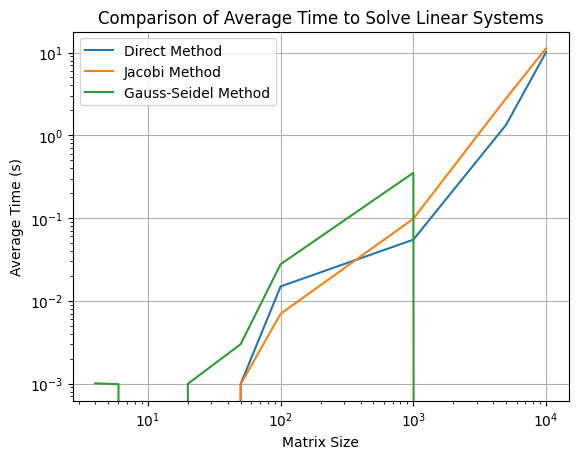

In [19]:
#parameters
matrix_sizes = [4, 6, 10, 20, 50, 100, 1000, 5000, 10000]
num_repeats = 5
jacobi_niter = 20
gauss_niter = 20
task3(matrix_sizes, num_repeats, jacobi_niter, gauss_niter, False)

### Error?
Stravil jsem ulohou dost casu a z pozorovani jsem nenasel bod kde je lepsi pouzit iteracni metodu, pro vetsi velikosti matic, uloha zabira velke mnozství času. Zlepseni času avsak jen pomoci sniženi niter, coz ale snizuje uspokojivost vysledku. Ulohu jsem na par mesicu opustil. Po navratu to same.  Pro zajimavost jsem pro mensi matice zacal sledovat vysledky, u size 50 plus neprakticke proto jsem od toho upustil drive nejspis. Jedna z veci co me zarazila je ze jacobi metoda ne vzdy konverguje k vysledku. Pro vetsi sizes jeste mene.  Muzete zkusit spustit task3 s printem pro vizualizaci.  Uvazme lehce poupraveny kod z materialu:


In [39]:
def jacobi(A, b, niteraci, x0=np.ones(len(A))):
    x = x0
    D = np.diag(A)
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    for i in range(niteraci):
        x = (b - np.matmul((L + U),x))/D
        print("iterace:",i, "x=",x)
    return x
"""
A = np.array([
    [2, 1], 
    [5, 10]
])
b = np.array([11, 13])
"""
size = 2
A = matrix = np.random.rand(size, size)
b = matrix = np.random.rand(size)
print(A, b)
x = np.linalg.solve(A, b)
print("reseni: ", x)
x = jacobi(A, b, 20)
print("reseni: ", x)

[[0.22853729 0.43791846]
 [0.8414817  0.12004254]] [0.7250437  0.96371571]
reseni:  [0.98219301 1.14308033]
iterace: 0 x= [1.25636061 1.0182558 ]
iterace: 1 x= [ 1.22137922 -0.77879677]
iterace: 2 x= [ 4.66485447 -0.53358202]
iterace: 3 x= [  4.194979  -24.6718695]
iterace: 4 x= [ 50.44826989 -21.37810714]
iterace: 5 x= [  44.13683008 -345.60730889]
iterace: 6 x= [ 665.41816996 -301.36498467]
iterace: 7 x= [  580.64193659 -4656.46164941]
iterace: 8 x= [ 8925.78875419 -4062.19192411]
iterace: 9 x= [  7787.06130708 -62560.52229214]
iterace: 10 x= [119880.36097071 -54578.19964927]
iterace: 11 x= [ 104584.79820183 -840336.79911978]
iterace: 12 x= [1610239.29465647 -733117.00975274]
iterace: 13 x= [  1404786.93552455 -11287547.75602246]
iterace: 14 x= [21628970.44601838 -9847355.00182718]
iterace: 15 x= [ 1.88693027e+07 -1.51616097e+08]
iterace: 16 x= [ 2.90523656e+08 -1.32271206e+08]
iterace: 17 x= [ 2.53455373e+08 -2.03653083e+09]
iterace: 18 x= [ 3.90235856e+09 -1.77668726e+09]
iterace: 

Muzete repeated spousted ulohu a zjistite že dost casu nekonverguje. Neco je tedy spatne. Velka pravdepodobnost je ze to je moje pochopení, a tudiz se omlouvam za nedostatecne vykonanou praci. Nicmene zde je par grafů:

now examining size:2
now examining size:4
now examining size:6
now examining size:10
now examining size:20
now examining size:40
now examining size:70
now examining size:100
now examining size:200


C:\Users\HP GAMING\AppData\Local\Temp\ipykernel_10588\2097687915.py:24: RuntimeWarning: overflow encountered in matmul
  x = np.matmul(T, x) + C             # x = Tx + C
C:\Users\HP GAMING\AppData\Local\Temp\ipykernel_10588\2097687915.py:24: RuntimeWarning: invalid value encountered in matmul
  x = np.matmul(T, x) + C             # x = Tx + C


now examining size:400
now examining size:700
now examining size:1000
now examining size:2000
now examining size:5000


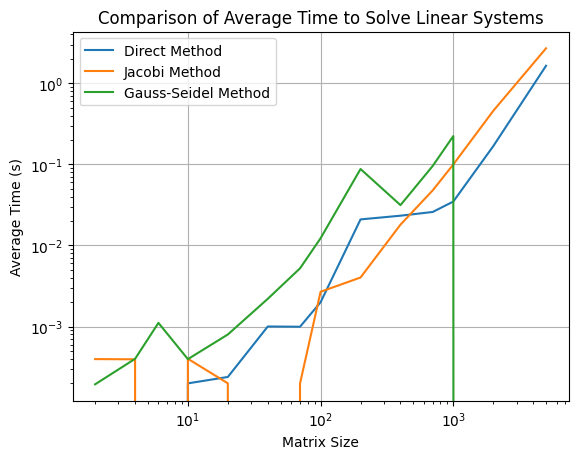

In [44]:
#parameters
matrix_sizes = [2, 4, 6, 10, 20, 40, 70, 100, 200, 400, 700, 1000, 2000, 5000]
num_repeats = 5
jacobi_niter = 20
gauss_niter = 20
task3(matrix_sizes, num_repeats, jacobi_niter, gauss_niter, False)

Tady zrovna vyšlo, že direct je vic time consuming u size 200, potom zase ale ne

now examining size:2
now examining size:4
now examining size:6
now examining size:10
now examining size:20
now examining size:40
now examining size:70
now examining size:100
now examining size:200
now examining size:400
now examining size:700
now examining size:1000
now examining size:2000
now examining size:5000
now examining size:10000


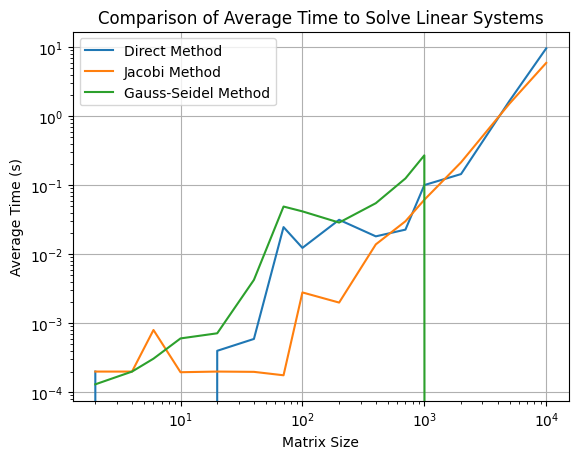

In [45]:
#parameters
matrix_sizes = [2, 4, 6, 10, 20, 40, 70, 100, 200, 400, 700, 1000, 2000, 5000, 10000]
num_repeats = 5
jacobi_niter = 10
gauss_niter = 10
task3(matrix_sizes, num_repeats, jacobi_niter, gauss_niter, False)

Dalsi zajimavy graph, jacobi predhani direct u 20 - 500, pote remiza

now examining size:2
now examining size:4
now examining size:6
now examining size:10
now examining size:20
now examining size:40
now examining size:70


C:\Users\HP GAMING\AppData\Local\Temp\ipykernel_10588\2097687915.py:24: RuntimeWarning: overflow encountered in matmul
  x = np.matmul(T, x) + C             # x = Tx + C
C:\Users\HP GAMING\AppData\Local\Temp\ipykernel_10588\2097687915.py:24: RuntimeWarning: invalid value encountered in matmul
  x = np.matmul(T, x) + C             # x = Tx + C


now examining size:100
now examining size:200
now examining size:400
now examining size:700
now examining size:1000
now examining size:1500


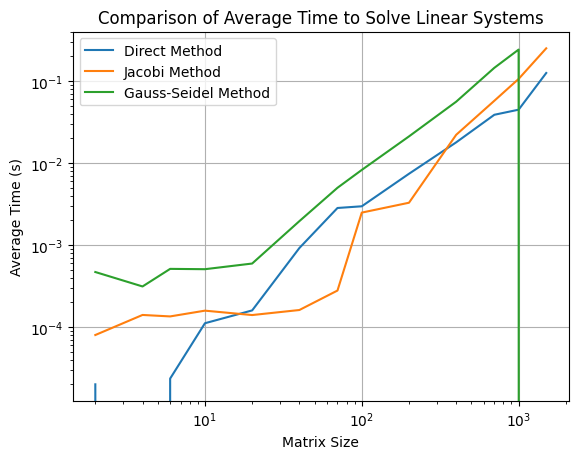

In [46]:
#parameters
matrix_sizes = [2, 4, 6, 10, 20, 40, 70, 100, 200, 400, 700, 1000, 1500]
num_repeats = 50
jacobi_niter = 20
gauss_niter = 20
task3(matrix_sizes, num_repeats, jacobi_niter, gauss_niter, False)

Zde 50 repeats pro nejvetsi konzistenci pro sizes till 1500. Stejny vysledek jako minule. 

Zde pro predstavu vysledky pro male sizes. Na konci kvuli delce

now examining size:2
Direct solution:[-0.51991261  1.14299217],
 Jacobi solution:[-0.51991213  1.14299212] 
, gauss_seidel solution: [-0.51991261  1.14299217]
now examining size:4
Direct solution:[ 1.04442272 -0.01196616  0.24518607 -0.58457822],
 Jacobi solution:[3.60865149e+12 4.93602128e+12 3.25787443e+12 8.69158362e+12] 
, gauss_seidel solution: [  897.18935657 -1495.49378066  1254.08471778  3078.18228977]
now examining size:6
Direct solution:[-6.65038075  4.43115739  3.29110684 -6.19814664  0.30709363  4.81943372],
 Jacobi solution:[4.73721065e+14 2.10309515e+14 2.28753011e+14 5.00834494e+14
 4.86758809e+14 2.15245093e+14] 
, gauss_seidel solution: [ -79936.61522457  -14584.899362    104743.76654599  177747.97498338
 -170777.23500026  -26421.50058705]
now examining size:8
Direct solution:[ 1.90641018 -0.54949229 -0.68812271  0.00817126  0.10489824 -2.08394801
  0.44592348  1.53529258],
 Jacobi solution:[1.01397006e+21 2.46726980e+20 5.28001016e+20 2.49110930e+20
 1.04014348e+21 2.

C:\Users\HP GAMING\AppData\Local\Temp\ipykernel_10588\2097687915.py:24: RuntimeWarning: overflow encountered in matmul
  x = np.matmul(T, x) + C             # x = Tx + C
C:\Users\HP GAMING\AppData\Local\Temp\ipykernel_10588\2097687915.py:24: RuntimeWarning: invalid value encountered in matmul
  x = np.matmul(T, x) + C             # x = Tx + C


Direct solution:[-3.36457348  1.05943503  0.21336005 -4.37410206 -0.29130886 -0.54434617
 -2.41253664 -0.94302217  1.18383782 -0.93250292 -3.75560227 -4.40662155
  0.1408026  -1.4272119   0.07926473 -2.02800844 -0.3971817  -0.8381936
 -2.1752771   0.1897864   1.7248823   1.95593432  2.88484086  0.49055118
  2.72955997  0.58774128 -0.97166339 -0.41117169  1.21583832  0.35013289
  5.23436062 -2.54392396  5.90729493  3.60372034 -0.25187238  0.79983591
 -3.36324087  2.61470769  0.55057077 -1.67421675  0.57700778 -0.73930854
 -2.87785304 -0.61394616  4.85314366 -3.17156172  1.72602119 -1.19733751
  3.21759134  4.06222973 -5.41435465 -0.80764617  6.29446209 -1.84474297
 -0.28595096  3.91501097  0.70747306 -0.94560942  1.44333522 -2.84960682
  0.27213873 -0.80694797  4.36996369 -4.32759863 -1.28652372 -3.97818025
  1.96063349 -0.93407443 -4.64277861 -4.06260027  0.95600882  5.72359265
 -1.57680112  5.45901719 -1.80383759  0.88772892  1.52914484 -2.39932258
  4.62803045 -3.426011    0.86414703

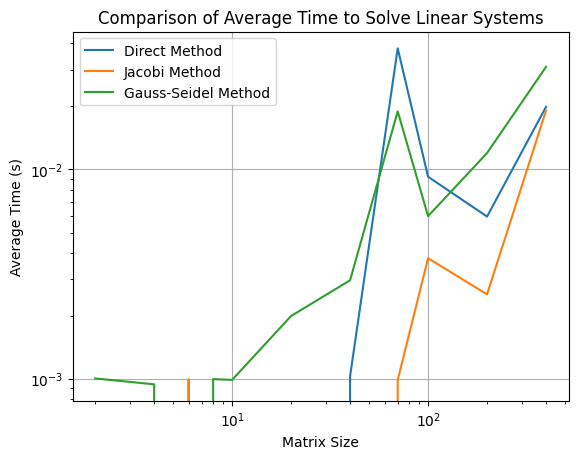

In [43]:
#parameters
matrix_sizes = [2, 4, 6, 8, 10, 20, 40, 70, 100, 200, 400]
num_repeats = 1
jacobi_niter = 20
gauss_niter = 20
task3(matrix_sizes, num_repeats, jacobi_niter, gauss_niter, True)